# Data manipulation with `dplyr` and visualization with `ggplot2`

In [1]:
# Some initial setup
options(digits = 3, repr.matrix.max.rows = 6)

# load tidyverse, which includes dplyr and ggplot
library("tidyverse")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


The [tidyverse](https://www.tidyverse.org) is a collection of actively-developed `R` packages that follow a certain principle of writing code.
Here, we will primarily focus on `dplyr`, which deals with data manipulation, and `ggplot2` which deals with data visualization.

First, we will start by reading some data. 
<!-- There are many functions in `tidyverse` (and `R` in general) for reading various data formats into the `R` environment as a table of data (or, `data.table`).
For example, either `read_csv` (from `tidyverse`) or `read.csv` (base `R`) can be used to read a `csv` file (e.g., a file where each line represents a row in the table, and the columns are separated by a `,`). -->

For this tutorial, we will be using the [titanic](https://www.kaggle.com/c/titanic/data) passenger data from Kaggle.
The (partial) schema of the data are being described in the following table.

**Variable**|**Definition**|**Key**
:-----:|:-----:|:-----:
Survived|Survival|0 = No, 1 = Yes
Pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd
Sex|Sex| 
Age|Age in years| 
SibSp|# of siblings / spouses aboard the Titanic| 
Parch|# of parents / children aboard the Titanic| 
Ticket|Ticket number| 
Fare|Passenger fare| 
Cabin|Cabin number| 
Embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton

To get started, let's first load and take a look at the data:

In [67]:
# load the csv data
# column types can be inferred automatically, but can also be specified with col_types argument
# run ?read_csv to learn more about reading in data!
passengers <- read_csv(
    "titanic.csv",
    col_types = cols(.default = "d", Name='c', Sex='f', Ticket='c', Embarked='c', Cabin='f')
    )

# cleaning some data
passengers <- passengers %>% drop_na(Embarked, Age)

# Summary of each column
summary(passengers)

  PassengerId     Survived         Pclass         Name               Sex     
 Min.   :  1   Min.   :0.000   Min.   :1.00   Length:712         male  :453  
 1st Qu.:223   1st Qu.:0.000   1st Qu.:1.00   Class :character   female:259  
 Median :445   Median :0.000   Median :2.00   Mode  :character               
 Mean   :449   Mean   :0.404   Mean   :2.24                                  
 3rd Qu.:677   3rd Qu.:1.000   3rd Qu.:3.00                                  
 Max.   :891   Max.   :1.000   Max.   :3.00                                  
                                                                             
      Age           SibSp          Parch         Ticket               Fare    
 Min.   : 0.4   Min.   :0.00   Min.   :0.00   Length:712         Min.   :  0  
 1st Qu.:20.0   1st Qu.:0.00   1st Qu.:0.00   Class :character   1st Qu.:  8  
 Median :28.0   Median :0.00   Median :0.00   Mode  :character   Median : 16  
 Mean   :29.6   Mean   :0.51   Mean   :0.43                 

## Introduction to `dplyr` verbs

In the world of `dplyr`, a _verb_ is a function that

* takes a data frame as its first argument, and
* returns another data frame as a result

Any function that meets this criteria, even if it's not necessarily a function in the `dplyr` package, can be considered a _verb_.

For example, the `head()` function in `R`, if applied to a data frame, will return a first `n` rows of a data frame.

In [68]:
# Return a data frame that consists of the first three rows of titanic
head(passengers, n = 3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,NA,S


In this sense, the base `R` function `head()` is a verb.

The **core idea** of `dplyr` is that a vast majority of data manipulation needs can be satisfied through a combination of five verbs.

verb                 | action
-------------------- | ---------
`filter(df, ...)`    | select a subset of _rows_ by some specified condition
`select(df, ...)`    | select a subset of _columns_
`mutate(df, ...)`    | create a _new column_ (often as a function of existing columns)
`arrange(df, ...)`   | reorder (sort) _rows_ according to values of specific _columns_
`summarize(df, ...)` | aggregate and reduce a vector (column) to a single value

We will explore each of these verbs (and some additional variations within each category) below.

### Selecting rows (1/5)

The `filter(df, ...)` verb is used to select a subset of _rows_ that satisfy the conditions specified in `...`. 
The conditions must be written in a form that would evaluate to either `TRUE` or `FALSE`.

For example, if we want a data frame of passengers in the 3rd clas:

In [69]:
filter(passengers, Pclass == 3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NA,S
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,NA,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NA,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.07,NA,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.13,NA,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.70,G6,S
13,0,3,"Saundercock, Mr. William Henry",male,20,0,0,A/5. 2151,8.05,NA,S
14,0,3,"Andersson, Mr. Anders Johan",male,39,1,5,347082,31.27,NA,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.85,NA,S


Multiple conditions can also be specified.

For example, if we want a data frame of all passengers in the 3rd class that are older than 50 years old:

In [70]:
filter(passengers, Pclass == 3, Age > 50)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
95,0,3,"Coxon, Mr. Daniel",male,59.0,0,0,364500,7.25,NA,S
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,NA,Q
153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.05,NA,S
223,0,3,"Green, Mr. George Henry",male,51.0,0,0,21440,8.05,NA,S
281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.75,NA,Q
327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.24,NA,S
407,0,3,"Widegren, Mr. Carl/Charles Peter",male,51.0,0,0,347064,7.75,NA,S
484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.59,NA,S
632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.05,NA,S


By default, `filter()` will combine multiple conditions as `AND` operations.
In the example above, we are returned passengers where `Pclass == 3` _**AND**_ `Age > 50`.

We can specify an OR condition by using the `|` operator.

We can explicitly specify an AND condition using the `&` operator.

For example, if we want passengers in the 3rd class who are either younger than 18 years old or older than 50 years old:

In [71]:
filter(passengers, Pclass == 3, Age > 50 | Age < 18)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.07,NA,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.70,G6,S
15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14,0,0,350406,7.85,NA,S
17,0,3,"Rice, Master. Eugene",male,2,4,1,382652,29.12,NA,Q
23,1,3,"McGowan, Miss. Anna ""Annie""",female,15,0,0,330923,8.03,NA,Q
25,0,3,"Palsson, Miss. Torborg Danira",female,8,3,1,349909,21.07,NA,S
40,1,3,"Nicola-Yarred, Miss. Jamila",female,14,1,0,2651,11.24,NA,C
51,0,3,"Panula, Master. Juha Niilo",male,7,4,1,3101295,39.69,NA,S
60,0,3,"Goodwin, Master. William Frederick",male,11,5,2,CA 2144,46.90,NA,S


Use the `%in%` operator to filter to values that match a collection of values. 

For example, suppose we want to look at passengers embarked on Queenstown (`Q`) and Southampton (`S`)

In [72]:
filter(passengers, 
       Embarked %in% c("Q", "S"))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NA,S
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NA,S
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.86,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.07,NA,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.13,NA,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.70,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.55,C103,S


Finally, use `!` to negate any condition. 

For example, if we wanted to find all passengers who did NOT embark on Queenstown (`Q`) and Southampton (`S`)

In [73]:
filter(passengers, 
       ! (Embarked %in% c("Q", "S")))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.28,C85,C
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.07,NA,C
31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.72,NA,C
35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.17,NA,C
40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.24,NA,C
44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.58,NA,C
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.73,D33,C
55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.98,B30,C
58,0,3,"Novel, Mr. Mansouer",male,28.5,0,0,2697,7.23,NA,C


### Exercise: `filter()`
Find all pasengers with 2 siblings/spouses and 2 parents/children aboard.

In [97]:
# YOUR CODE HERE
# START
filter(passengers, SibSp == 2, Parch == 2)
# END

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9,2,2,W./C. 6608,34.4,NA,S
312,1,1,"Ryerson, Miss. Emily Borie",female,18,2,2,PC 17608,262.4,B57 B59 B63 B66,C
437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21,2,2,W./C. 6608,34.4,NA,S
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21,2,2,PC 17608,262.4,B57 B59 B63 B66,C


### Selecting columns (2/5)

Use `select(df, ...)` to either specify which columns to select,

In [75]:
select(passengers, Survived, Pclass, Age)

Survived,Pclass,Age
<dbl>,<dbl>,<dbl>
0,3,22
1,1,38
1,3,26
1,1,35
0,3,35
0,1,54
0,3,2
1,3,27
1,2,14


or to specify which columns to exclude, using `-`.

In [76]:
select(passengers, -Name, -SibSp, -Parch)

# Equivalently:
# select(passengers, -c(Name, SibSp, Parch))

PassengerId,Survived,Pclass,Sex,Age,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<chr>,<dbl>,<fct>,<chr>
1,0,3,male,22,A/5 21171,7.25,NA,S
2,1,1,female,38,PC 17599,71.28,C85,C
3,1,3,female,26,STON/O2. 3101282,7.92,NA,S
4,1,1,female,35,113803,53.10,C123,S
5,0,3,male,35,373450,8.05,NA,S
7,0,1,male,54,17463,51.86,E46,S
8,0,3,male,2,349909,21.07,NA,S
9,1,3,female,27,347742,11.13,NA,S
10,1,2,female,14,237736,30.07,NA,C


`tidyverse` also provides some useful helper functions to `select()` columns that match specific criteria.

* `starts_with(x)`: match column names that start with `x`
* `ends_with(x)`: match column names that end with `x`
* `contains(x)`: match column names that contain `x`
* `matches(x)`: match column names that match (the regular expression) `x`

where `x` is a string (in either single- or double-quotes).

For example, if we want all the columns that start with letter `S`:

In [77]:
select(passengers, starts_with('S'))

Survived,Sex,SibSp
<dbl>,<fct>,<dbl>
0,male,1
1,female,1
1,female,0
1,female,1
0,male,0
0,male,0
0,male,3
1,female,0
1,female,1


You can see the documentation for `select()` for details.
In general, for any `R` function, you can pull-up the documentation (if one exists) by running `?` followed by the function name.
For example, to see the documentation for `select()` as provided in the `dplyr` package, uncomment and run the following (warning! the output is long):

In [41]:
# ?dplyr::select

### Create new columns (3/5)

Use `mutate(df, ...)` to create new columns, usually as a function of existing columns.

Suppose we wish to create a column called `no_sib`, indicating whether the passenger has no sibling or spouse aboard.
We would write,

In [12]:
mutate(passengers, no_sib = (SibSp == 0))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_sib
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>,<lgl>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NA,S,FALSE
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.28,C85,C,FALSE
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,NA,S,TRUE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.00,B42,S,TRUE
890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.00,C148,C,TRUE
891,0,3,"Dooley, Mr. Patrick",male,32,0,0,370376,7.75,NA,Q,TRUE


We note that within a single `mutate()` function, you can refer to the new columns you've created in the previous argument. For example:

In [78]:
mutate(passengers, 
       no_sib = (SibSp == 0),
       first_class = (Pclass == 1),
       no_sib_and_first_class = no_sib & first_class
      )

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,no_sib,first_class,no_sib_and_first_class
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>,<lgl>,<lgl>,<lgl>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NA,S,FALSE,FALSE,FALSE
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.28,C85,C,FALSE,TRUE,FALSE
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,NA,S,TRUE,FALSE,FALSE
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,C123,S,FALSE,TRUE,FALSE
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NA,S,TRUE,FALSE,FALSE
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.86,E46,S,TRUE,TRUE,TRUE
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.07,NA,S,FALSE,FALSE,FALSE
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.13,NA,S,TRUE,FALSE,FALSE
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.07,NA,C,FALSE,FALSE,FALSE


### Exercise: `mutate()`
Create a column `num_family` representing the number of family members on board for each passenger (the sum of sibling/spouse number and parent/children number)

In [79]:
# YOUR CODE HERE
# START solution
mutate(passengers, num_family = SibSp + Parch)
# END solution

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,num_family
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>,<dbl>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NA,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.28,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,NA,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NA,S,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.86,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.07,NA,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.13,NA,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.07,NA,C,1


### Sorting (4/5)

Use `arrange(df, ...)` to reorder the rows of a data frame by the value of specified columns.
Multiple conditions are arranged from left to right.

Note that `arrange` orders from lowest to highest by default.

In [98]:
arrange(passengers, Pclass, Name)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
731,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3,B5,S
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.6,C22 C26,S
298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.6,C22 C26,S
499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.6,C22 C26,S
461,1,1,"Anderson, Mr. Harry",male,48.00,0,0,19952,26.6,E12,S
276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.00,1,0,13502,78.0,D7,S
807,0,1,"Andrews, Mr. Thomas Jr",male,39.00,0,0,112050,0.0,A36,S
572,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.00,2,0,11769,51.5,C101,S
494,0,1,"Artagaveytia, Mr. Ramon",male,71.00,0,0,PC 17609,49.5,NA,C


Use `desc()` around columns that you want to sort in `desc`ending order.

In [99]:
arrange(passengers, Pclass, desc(Name))

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
326,1,1,"Young, Miss. Marie Grice",female,36,0,0,PC 17760,135.6,C32,C
556,0,1,"Wright, Mr. George",male,62,0,0,113807,26.6,NA,S
156,0,1,"Williams, Mr. Charles Duane",male,51,0,1,PC 17597,61.4,NA,C
378,0,1,"Widener, Mr. Harry Elkins",male,27,0,2,113503,211.5,C82,C
857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45,1,1,36928,164.9,NA,S
319,1,1,"Wick, Miss. Mary Natalie",female,31,0,2,36928,164.9,C7,S
103,0,1,"White, Mr. Richard Frasar",male,21,0,1,35281,77.3,D26,S
125,0,1,"White, Mr. Percival Wayland",male,54,0,1,35281,77.3,D26,S
695,0,1,"Weir, Col. John",male,60,0,0,113800,26.6,NA,S


### Aggregating (5/5)

Use `summarize(df, ...)` to aggregate multiple rows into a single row. Unlike `mutate()`, function that are used in `summarize()` must return a single value (i.e., "aggregate" the provided vector)

For example, to find the min, mean, and max age of all passengers,

In [100]:
summarize(passengers,
          min_height = min(Age),
          avg_height = mean(Age),
          max_height = max(Age)
         )

min_height,avg_height,max_height
<dbl>,<dbl>,<dbl>
0.42,29.6,80


`dplyr` also provides a special function `n()` which will evaluate to the number of rows within a `dplyr` verb.

For example, to count how many passengers (rows) there are in our dataset in total, 

In [102]:
summarize(passengers, N = n())

N
<int>
712


### Exercise: `summarize()`
Calculate the mean, median and standard deviation of `Fare`.
(hint: using `median` and `sd` function for median and standard deviation respectively) 

In [84]:
# YOUR CODE HERE
# START solution
summarize(passengers,
          mean = mean(Fare),
          median = median(Fare),
          sd = sd(Fare))
# END solution

mean,median,sd
<dbl>,<dbl>,<dbl>
34.6,15.6,52.9


### Grouping (Split-apply-combine)

Now that we've covered the five core verbs, we should be able to manipulate data to our heart's desire!

Then, how about:

* The number of passengers for each `Pclass`?
* Survival rates in each `Pclass`?
* Number of each `Pclass` for passengers embarked on each port?

As an example, let's just consider the number of passengers for each `Pclass`

A natural, but _**tedious**_ way to compute this would look something like this:

In [103]:
#########
# NOTE: Code in this cell is intended to be an example of a BAD way to compute this.
# This is purely for illustrative purposes, and should NEVER EVER be re-used, in any context.
#########

# 1. Split into separate datasets by Pclass
class1_passengers <- filter(passengers, Pclass == 1)
class2_passengers <- filter(passengers, Pclass == 2)
class3_passengers <- filter(passengers, Pclass == 3)

# 2. Count the number of rows in each dataset.
N_1 <- summarize(class1_passengers, N = n())
N_2 <- summarize(class2_passengers, N = n())
N_3 <- summarize(class3_passengers, N = n())

# 3. Aggregate the counts into a single vector.
c(class1_total = N_1$N, 
  class2_total = N_2$N,
  class3_total = N_3$N)

# REMINDER: This is a TERRIBLE way to do this and should not be repeated!

class1_total class2_total class3_total 
         184          173          355

This style of code can easily get out of hand, and would be a nightmare to maintain! 
(e.g., what happens if we get a new dataset where we want to count the number of rows for 50 different categories rather than just 3 categories)

As horrible as the above code is, it is useful in highlighting a common pattern that emerges when manipulating data:

1. **Split**: The data are split into smaller pieces of data, according to one (or more) column. 
   In this case, we've split the data by the `Pclass` column.
1. **Apply**: Some operation is applied to each of the smaller pieces.
   In this case, we've simply counted the number of rows of each piece using `summarize()` and `n()`.
1. **Combine**: The results of the previous **apply** are combined to some final data structure.
   In the above case, for simplicity, we've combinded the result as a vector; but in practice we usually want to keep everything in the form of a data frame.

This pattern in data manipulation is so common, that there is a `dplyr` verb for it. 
This is the `group_by` verb.

On its own, `group_by` makes no visible changes to a data frame, other than marking the data frame as being "grouped".
The difference is only made apparent when we apply some other verb to a grouped data frame.

Note that none of the `dplyr` verbs make any changes to the original data frame! This is very intentional. 
So, for now, we need to save the "grouped" data as a new variable for our changes to have effect (but we'll see a more convenient approach to this later).

In [63]:
passengers_by_class <- group_by(passengers, Pclass)

# Note that the two data frames, on the surface, seem identical.
passengers
passengers_by_class

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NA,S
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.86,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.07,NA,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.13,NA,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.07,NA,C


PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.28,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.92,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.10,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,NA,S
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.86,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.07,NA,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.13,NA,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.07,NA,C


In [86]:
# But we can see a difference when applying, for example, a summarize
summarize(passengers, N = n())

N
<int>
712


In [107]:
summarize(passengers_by_class, N = n())

`summarise()` ungrouping output (override with `.groups` argument)


Pclass,N
<dbl>,<int>
1,184
2,173
3,355


Note: For now, don't be too concerned about the warning `summarise() ungrouping output (override with .groups argument)`. To silence the warning, include `.groups="drop"` as an argument to `summarize`. Or, simply ignore the warning for now.

As shown in the simple example above, when a `dplyr` verb is applied to a "grouped" data frame,
`dplyr` internally **splits**-**applies**-and **combines** the data, finally returning results for
_each of the unique values that are found in the columns by which the data frame is grouped_.

This can be a lot to process, if it's the first time you've seen this. 
But once you get used to it (via trying a bunch of manipulation tasks and seeing some more examples), you'll find it extremely convenient and powerful.

Let's try answering the other questions we started this section with.

* Survival rates in each `Pclass`?

In [112]:
passengers_by_class <- group_by(passengers, Pclass)

summarize(passengers_by_class, 
          survival_rate = mean(Survived),
          
          .groups = "drop")

Pclass,survival_rate
<dbl>,<dbl>
1,0.652
2,0.480
3,0.239


* Number of each `Pclass` for passengers embarked on each port?

In [111]:
passengers_by_port <- group_by(passengers, Embarked, Pclass)

summarize(passengers_by_port, 
          N = n(),
          
          .groups = "drop")

Embarked,Pclass,N
<chr>,<dbl>,<int>
C,1,74
C,2,15
C,3,41
Q,1,2
Q,2,2
Q,3,24
S,1,108
S,2,156
S,3,290


### Exercise: `group_by()`

Calculate the mean fare and survival rate for passengers in each Pclass, respectively.

In [110]:
# YOUR CODE HERE
# START solution
class_group <- group_by(passengers, Pclass)
summarize(class_group, 
          mean_fare = mean(Fare),
          survival_rate = mean(Survived),
          
          .groups="drop"
         )
# END solution

Pclass,mean_fare,survival_rate
<dbl>,<dbl>,<dbl>
1,88.0,0.652
2,21.5,0.480
3,13.2,0.239


### Multiple (chained) operations

As we've briefly seen above, we would often like to apply multiple operations (verbs) to a data frame.
However, by design, verbs do not save intermediate changes to the original data frame, so for each operation we would have to assign the result to a new data frame.

Even for a reasonable number of operations, this can get quite messy (i.e., we'd end up with so many names and data frames that we only use as intermediate steps).

Consider the following query:

* For each port, what is the proportion of each class?

We can think of finding the answer in multiple steps:

1. group by `Embarked` and `Pclass`
1. find the number of passengers for each of the groups in the previously grouped data frame
1. with the computed number of passengers for each class-port pair, re-group by only `Embarked`
1. create a new column which computes the proportion of counts for each row, over the sum of rows

Using the current method of saving all intermediate results, the implementation would look something like this:

In [113]:
###########
# NOTE: Code in this cell is intended to be an example of a BAD implementation.
#       While this implementation is acceptable, it is intended for illustrative purposes, 
#       and is best avoided.  
###########

passengers_by_port_and_class <- group_by(passengers, Embarked, Pclass)
counts_by_port_and_class <- summarize(passengers_by_port_and_class, N = n())
regroup_by_port <- group_by(counts_by_port_and_class, Embarked)
mutate(regroup_by_port, prop = N / sum(N))

# REMINDER: This is NOT ideal code. Use the %>% instead (see below).

`summarise()` regrouping output by 'Embarked' (override with `.groups` argument)


Embarked,Pclass,N,prop
<chr>,<dbl>,<int>,<dbl>
C,1,74,0.5692
C,2,15,0.1154
C,3,41,0.3154
Q,1,2,0.0714
Q,2,2,0.0714
Q,3,24,0.8571
S,1,108,0.1949
S,2,156,0.2816
S,3,290,0.5235


The above code is bad for a multiple reasons. Among others, it's

* creating a lot of unnecessary intermediate results that will not be used again
* difficult to read, if you don't already know what the end goal is (e.g., you eyes have to wander left-to-right-to-left a few times to see what's going on)

A sophisticated, yet quite simple, solution to this problem is the introduction of `%>%`, also called the "pipe operator".

`%>%` is a _binary operator_ (much like `+` or `-`) which, in words, takes the result of the left-hand side, and uses it as the first argument on the right hand side. 
This may be confusing at first, but might make more sense in the context of `dplyr` _verbs_. Recall, a _verb_ in `dplyr` is any function that _returns a data frame_ (LHS) and _takes a data frame as its first argument_ (RHS).

If further notation is helpful, one could also write the `%>%` as
```
x %>% f(y) = f(x, y)
```

What this means from a practical standpoint, however, is that we no longer need to _save_ intermediate results just to use them in the next verb. 
Instead, we can use `%>%` to send results from a verb down a "pipe" to the next verb.
Consider our previous example, which involved four verbs, with three intermediate steps.
Using `%>%`, the same result can now be achieved in a (conceptually) single line:

In [116]:
passengers %>% 
    group_by(Embarked, Pclass) %>%
    summarize(N = n(),
              .groups = "drop") %>%
    group_by(Embarked) %>%
    mutate(prop = N / sum(N))

Embarked,Pclass,N,prop
<chr>,<dbl>,<int>,<dbl>
C,1,74,0.5692
C,2,15,0.1154
C,3,41,0.3154
Q,1,2,0.0714
Q,2,2,0.0714
Q,3,24,0.8571
S,1,108,0.1949
S,2,156,0.2816
S,3,290,0.5235


Note the intentional style of (1) starting from the data frame (instead of a verb that explicitly includes the data frame) and (2) keeping each verb on its own line. 
This not only makes it easier to read, but also easier to maintain and modify.

### Exercise: Putting it all together
1. Create a column `age_group` that groups each passenger's age down to the 10s (i.e., 0-9, 10-19, 20-29, etc.)
1. Calculate the number of passengers and survival rate for each (`Pclass`, `age_group`) pair

What patterns do you observe?

(hint1: function `floor` takes in x and returns the largest integers not greater than the corresponding elements of x, e.g., `floor(1.9)` will return `1`)

(hint2: you can run `options(repr.matrix.max.rows = 20)` to display more rows at a time)


In [118]:
options(repr.matrix.max.rows = 20)
# YOUR CODE HERE
# START solution
passengers  %>% 
    mutate(age_group = floor(Age / 10) * 10) %>%
    group_by(Pclass, age_group) %>%
    summarize(
        N = n(),
        survival_rate = mean(Survived),
        
        .groups = "drop"
    )
# END solution

Pclass,age_group,N,survival_rate
<dbl>,<dbl>,<int>,<dbl>
1,0,3,0.667
1,10,18,0.833
1,20,34,0.706
1,30,49,0.776
1,40,37,0.595
1,50,27,0.556
1,60,12,0.250
1,70,3,0.000
1,80,1,1.000


## `dplyr` ending notes

There are many, MANY more verbs that we simply did not have the time to cover here, but are immensely useful. 
Some examples are:

* `rename(df, ...)`: rename columns
* `slice(df, ...)`: select rows of a data frame by index, instead of some condition
* `top_n(df, N, col)`: retrieve the top N rows for values in some specified column

You are highly recommended to explore more. One great resource for learning about `tidyverse` and using it to work with data is Hadley Wickham's online book: [R for Data Science](https://r4ds.had.co.nz/). 

Hadley Wickham is also the original author for many of the packages in `tidyverse`. In fact, in the "early days" (circa 2016), before the word `tidyverse` was created, the collection of Hadley Wickham's `R` packages were unofficially referred to as the `hadleyverse`, until [Hadley announced tidyverse and explicitly asked people to stop calling it the hadleyverse](https://twitter.com/hadleywickham/status/774008060549312512?lang=en).

# `ggplot2` mini-tutorial

First off, here are three great ways to become a `ggplot2` pro:
- Chapter 3 of R4DS (**I cannot stress this enough!**): https://r4ds.had.co.nz/data-visualisation.html
- Look at the sample code for the plots that Sharad showed in lecture
- Visualization slides in `extra-materials` folder for this section
- Google "how to do [X] with ggplot" !

Now, consider our final result from the `dplyr` introduction:

In [119]:
survival_by_age_group <- 
    passengers  %>% 
    mutate(age_group = floor(Age / 10) * 10) %>%
    group_by(Pclass, age_group) %>%
    summarize(
        N = n(),
        survival_rate = mean(Survived),
        
        .groups = "drop"
    )

survival_by_age_group

Pclass,age_group,N,survival_rate
<dbl>,<dbl>,<int>,<dbl>
1,0,3,0.667
1,10,18,0.833
1,20,34,0.706
1,30,49,0.776
1,40,37,0.595
1,50,27,0.556
1,60,12,0.250
1,70,3,0.000
1,80,1,1.000


With a some effort, we can glean a story from this table. But, the table imposes a high cognitive load. 
    
Reducing cognitive load is a key goal of data visualization. Let's see if we can tell a richer story with a scatterplot.

The following formula is a helpful starting point for building a scatterplot with `ggplot2`: 

``` 
ggplot(<DATAFRAME>) +
    geom_point(aes(x = <X_VARIABLE_NAME>, y = <Y_VARIABLE_NAME>))
```

Note: Both `dplyr` and `ggplot2` are automatically imported after calling `library(tidyverse)`

Here's the formula in action:

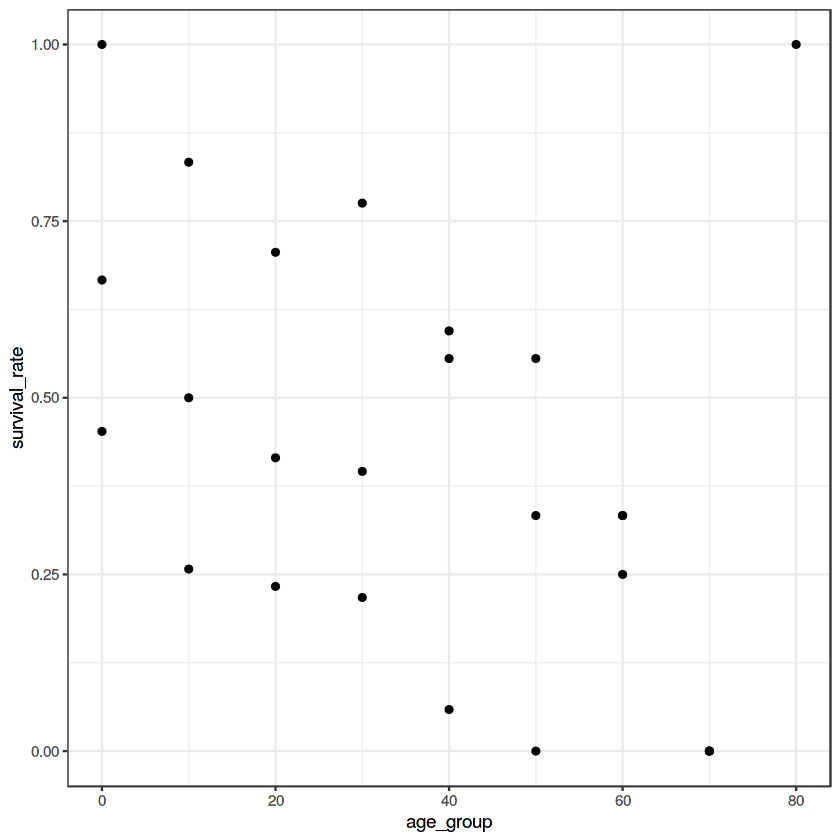

In [45]:
ggplot(survival_by_age_group) +
    geom_point(aes(x = age_group, y = survival_rate))

Oof, this is messy. So far, I think I'd rather read the table!

To make it easier to distinguish the groups, let's color the points by group.

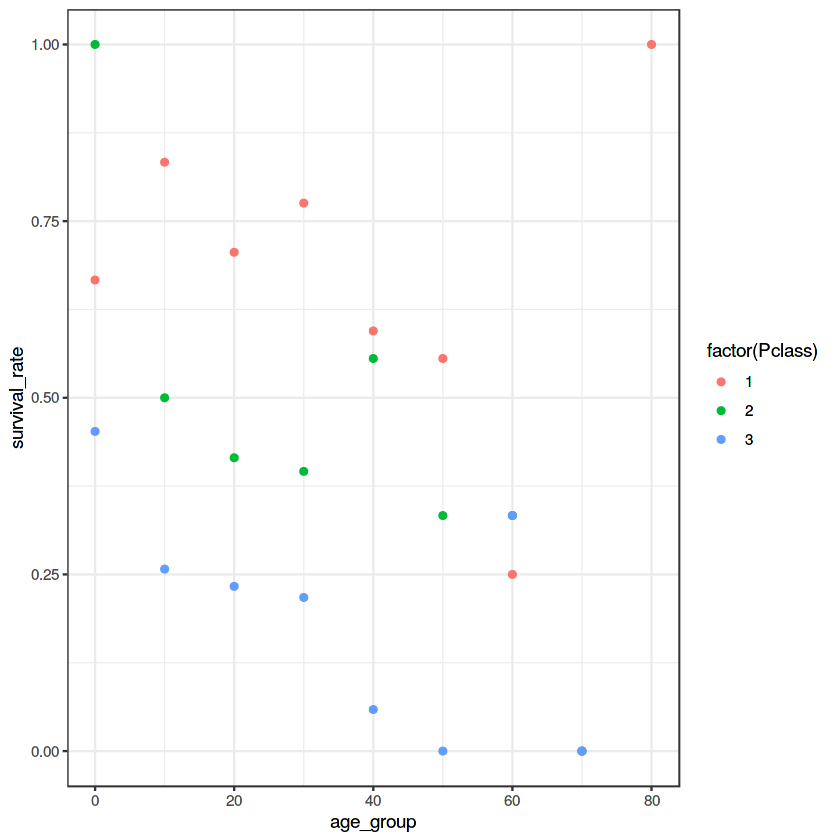

In [48]:
ggplot(survival_by_age_group) +
    geom_point(aes(x = age_group, y = survival_rate, color = factor(Pclass)))

A little better? Notice how ``ggplot`` automatically gave us a legend, that sure is nice.

Since age groups are sequential and ordered, it would be helpful to connect our points. Connecting the points will make it easier to see a trend.


Note: ``ggplot2`` uses `+` to chain calls, not `%>%`

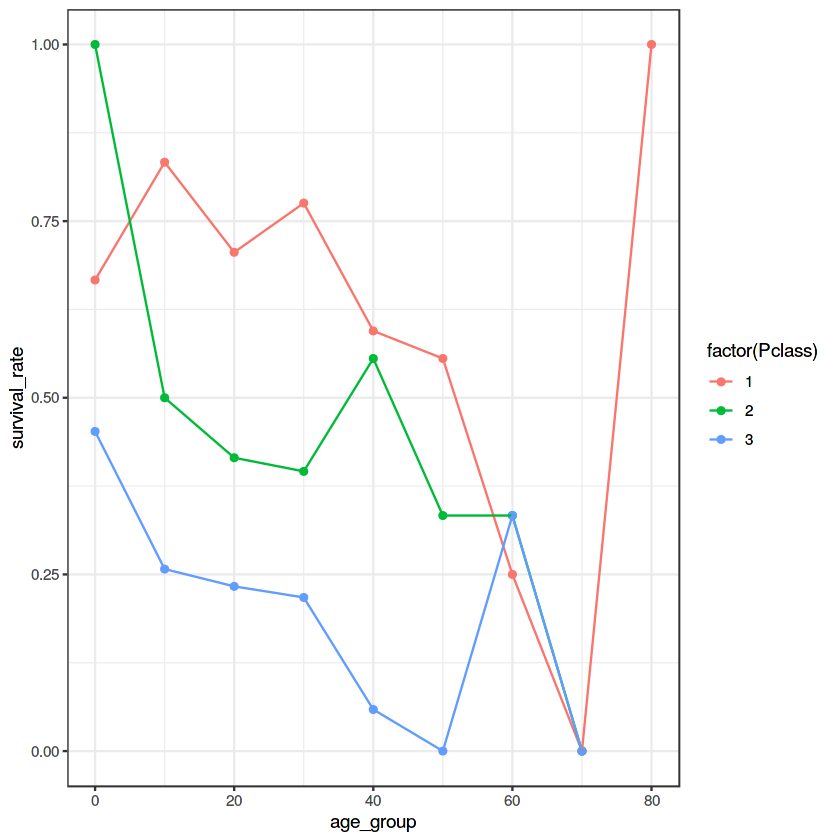

In [51]:
ggplot(survival_by_age_group) +
    geom_point(aes(x = age_group, y = survival_rate, color = factor(Pclass))) +
    geom_line(aes(x = age_group, y = survival_rate, color = factor(Pclass)))

Better! It looks like something funny is going on at the high end of the first class group.

After inspecting the table, it looks like the highest age group has few individuals. Let's change the size of our points to reflect this lack of data.

Notice how point size is only relevant to the points, not the lines, so we only refer to size inside `geom_point`.

Also, `geom_point` and `geom_line` currently share the same call to `aes`, so we can conveniently abstract that code to the main ``ggplot`` call.

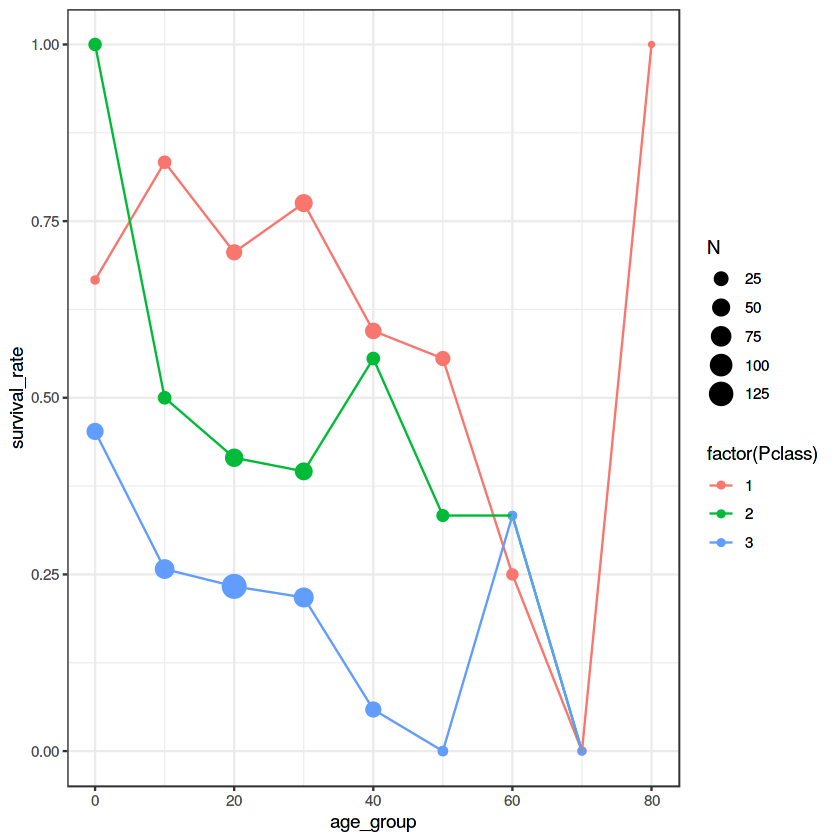

In [53]:
ggplot(survival_by_age_group, aes(x = age_group, y = survival_rate, color = factor(Pclass))) +
    geom_point(aes(size = N)) +
    geom_line()

This plot is looking pretty good. Below are some potential improvements; can you think of any others?
- Add better labels and units to the x and y axes
- Change the y-axis to percentages
- Rename the legends to something more descriptive
- Give the plot a title that briefly summarizes the takeaway.
- Remove the gridlines (an example of "chart junk")
- Remove the gray background

The code below contains each of these improvements.

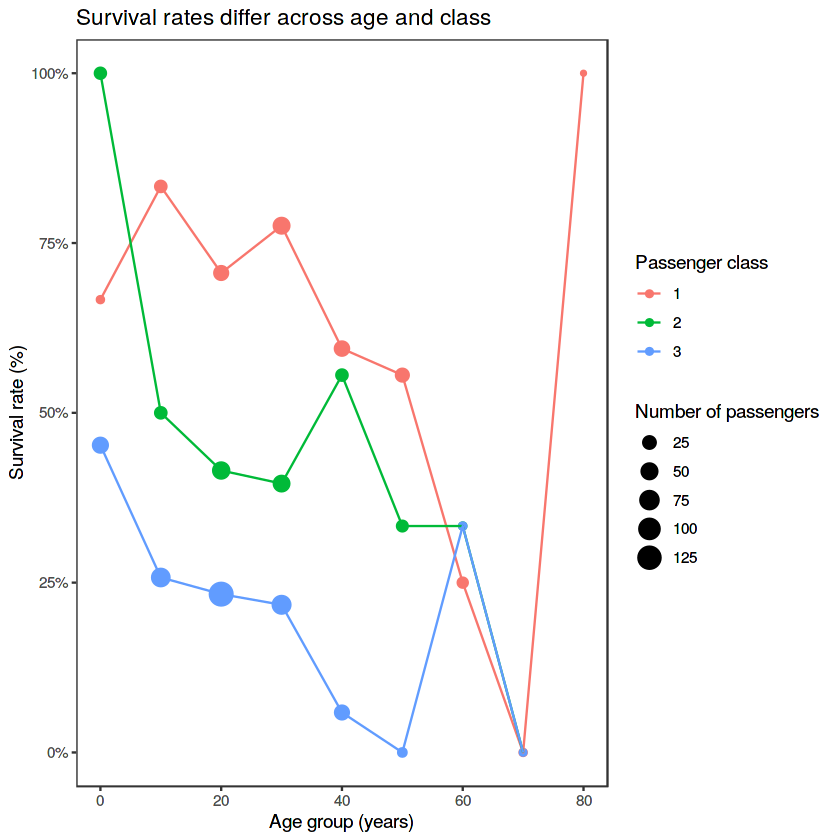

In [93]:
theme_set(theme_bw())

ggplot(survival_by_age_group, aes(x = age_group, y = survival_rate, color = factor(Pclass))) +
    geom_point(aes(size = N)) +
    geom_line() +
    scale_x_continuous(
        name = "Age group (years)"
    ) +
    scale_y_continuous(
        name = "Survival rate (%)",
        labels = scales::percent_format(accuracy=1)
    ) +
    scale_size_continuous(
        name = "Number of passengers"
    ) +
    scale_color_discrete(
        name = "Passenger class"
    ) +
    ggtitle("Survival rates differ across age and class") +
    theme(
        panel.grid = element_blank()
    )
    

To save a plot, use ``ggsave``. 

``ggsave`` will automatically save the most recently created plot, unless you specify otherwise. See ``?ggsave`` for more details. 

In [96]:
ggsave("survival_rates.pdf", width=6, height=4)

Finally, I want to again stress three great ways to familiarize yourself with `ggplot2`: 
- Chapter 3 of R4DS (**I cannot stress this enough!**): https://r4ds.had.co.nz/data-visualisation.html
- Look at the sample code for the plots that Sharad showed in lecture
- Google "how to do [X] with ggplot" !